# Import and Install

In [5]:
pip install git+https://github.com/csebuetnlp/normalizer -q

/usr/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


  Preparing metadata (setup.py) ... done
Note: you may need to restart the kernel to use updated packages.


In [6]:
!pip install datasets -q

In [7]:
from transformers import AutoModelForSequenceClassification, AutoTokenizer, Trainer, TrainingArguments
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
from sklearn.model_selection import train_test_split
from normalizer import normalize
from datasets import load_dataset
import torch
import numpy as np
import pandas as pd

# Loading Dataframe

In [8]:
df = pd.read_csv("/kaggle/input/imdb-10k-gt-bangla/imdb-bangla-gt-10000.csv")
df = df.iloc[:1000]

In [9]:
df

,Unnamed: 0,review,translated,sentiment
0,0,One of the other reviewers has mentioned that ...,অন্য একজন পর্যালোচক উল্লেখ করেছেন যে মাত্র 1 O...,positive
1,1,A wonderful little production. <br /><br />The...,একটি বিস্ময়কর সামান্য উত্পাদন. <br /><br />চি...,positive
2,2,I thought this was a wonderful way to spend ti...,আমি ভেবেছিলাম খুব গরম গ্রীষ্মের সপ্তাহান্তে সম...,positive
3,3,Basically there's a family where a little boy ...,মূলত একটি পরিবার আছে যেখানে একটি ছোট ছেলে (জেক...,negative
4,4,"Petter Mattei's ""Love in the Time of Money"" is...","Petter Mattei এর ""লাভ ইন দ্য টাইম অফ মানি"" একট...",positive
...,...,...,...,...
995,995,Nothing is sacred. Just ask Ernie Fosselius. T...,কিছুই পবিত্র নয়। শুধু এর্নি ফসেলিয়াসকে জিজ্ঞ...,positive
996,996,I hated it. I hate self-aware pretentious inan...,আমি এটা ঘৃণা. আমি স্ব-সচেতন ভৌতিক উন্মাদনাকে ঘ...,negative
997,997,I usually try to be professional and construct...,যখন আমি চলচ্চিত্রের সমালোচনা করি তখন আমি সাধার...,negative
998,998,If you like me is going to see this in a film ...,যদি আপনি পছন্দ করেন যে আমি এটি আপনার স্কুলে এক...,negative


In [10]:
from datasets import Dataset, DatasetDict
train_df, valid_df = train_test_split(df, test_size = 0.3)
val_df, test_df = train_test_split(valid_df, test_size = 0.5)

In [11]:
train_df

,Unnamed: 0,review,translated,sentiment
26,26,"""The Cell"" is an exotic masterpiece, a dizzyin...","""দ্য সেল"" একটি বহিরাগত মাস্টারপিস, শুধুমাত্র এ...",positive
250,250,"Supposedly a ""social commentary"" on racism and...",1970 এর গ্রামীণ দক্ষিণে বর্ণবাদ এবং কারাগারের ...,negative
753,753,Just saw this movie on opening night. I read s...,উদ্বোধনী রাতে এই মুভিটি দেখেছি। আমি অন্য কিছু ...,negative
152,152,"Robert Altman's downbeat, new-fangled western ...","এডমন্ড নটনের বই ""ম্যাককেব"" থেকে রবার্ট অল্টম্য...",negative
663,663,when i first heard about this movie i thought ...,যখন আমি প্রথম এই মুভিটি সম্পর্কে শুনেছিলাম তখন...,positive
...,...,...,...,...
946,946,I first remember bumping into this zaniness fr...,আমার প্রথম মনে আছে জুকার ভাই এবং জিম আব্রাহামস...,positive
819,819,I love Jamie Foxx.<br /><br />And I enjoy 99% ...,আমি জেমি ফক্সকে ভালোবাসি।<br /><br />এবং আমি য...,negative
419,419,This would've been a *great* silent film. The ...,এটি একটি *দারুণ* নির্বাক চলচ্চিত্র হত। অভিনয়ট...,negative
722,722,I only heard about Driving Lessons through the...,আমি শুধুমাত্র ITV বিজ্ঞাপনের মাধ্যমে ড্রাইভিং ...,positive


# Tokenization

In [12]:
checkpoint = "csebuetnlp/banglabert_large"
tokenizer = AutoTokenizer.from_pretrained(checkpoint)

tokenizer_config.json:   0%|          | 0.00/119 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/880 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/528k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [13]:
max_length = 256

In [14]:
train_encodings = tokenizer(
    [normalize(sentence) for sentence in train_df.translated], 
    truncation=True,
    padding=True,
    max_length=max_length
)

val_encodings = tokenizer(
    [normalize(sentence) for sentence in valid_df.translated], 
    truncation=True,
    padding=True,
    max_length=max_length
)

test_encodings = tokenizer(
    [normalize(sentence) for sentence in test_df.translated], 
    truncation=True,
    padding=True,
    max_length=max_length
)

In [15]:
class SentimentDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

In [16]:
train_labels = [0 if row.sentiment == "positive" else 1 for idx, row in train_df.iterrows()]
train_dataset = SentimentDataset(train_encodings, train_labels)
val_labels = [0 if row.sentiment == "positive" else 1 for idx, row in valid_df.iterrows()]
val_dataset = SentimentDataset(val_encodings, val_labels)
test_labels = [0 if row.sentiment == "positive" else 1 for idx, row in test_df.iterrows()]
test_dataset = SentimentDataset(test_encodings, test_labels)

In [17]:
model = AutoModelForSequenceClassification.from_pretrained(checkpoint, num_labels=2)

pytorch_model.bin:   0%|          | 0.00/1.35G [00:00<?, ?B/s]

Some weights of ElectraForSequenceClassification were not initialized from the model checkpoint at csebuetnlp/banglabert_large and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [18]:
training_args = TrainingArguments(
    output_dir="./results",
    num_train_epochs=5,
    per_device_train_batch_size=16,
    learning_rate=4e-5,
    warmup_steps=500,
    weight_decay=0.01,
    logging_dir='./logs',
    logging_steps=10,  
    evaluation_strategy="epoch",  
    save_strategy="epoch", 
    report_to=["none"]
)

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1525: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


In [19]:
def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average='binary')
    acc = accuracy_score(labels, preds)
    return {
        'accuracy': acc,
        'f1': f1,
        'precision': precision,
        'recall': recall
    }

In [20]:
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    compute_metrics=compute_metrics,
)

# Training

In [21]:
trainer.train()

Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
1,0.699100,0.691779,0.490000,0.646651,0.489510,0.952381
2,0.686400,0.665149,0.630000,0.412698,0.928571,0.265306
3,0.489800,0.400398,0.830000,0.843077,0.769663,0.931973
4,0.389500,0.293682,0.893333,0.891156,0.891156,0.891156
5,0.218300,0.436909,0.863333,0.850909,0.914062,0.795918


TrainOutput(global_step=220, training_loss=0.5222427216443148, metrics={'train_runtime': 376.505, 'train_samples_per_second': 9.296, 'train_steps_per_second': 0.584, 'total_flos': 1630879885824000.0, 'train_loss': 0.5222427216443148, 'epoch': 5.0})

# Result

In [22]:
eval_results = trainer.evaluate()

print("\n" + "="*40)
print("    Evaluation Results".center(40))
print("="*40)

for key, value in eval_results.items():
    print(f"{key.replace('_', ' ').title():<35}: {value:>8.4f}")

print("="*4)


             Evaluation Results         
Eval Loss                          :   0.4369
Eval Accuracy                      :   0.8633
Eval F1                            :   0.8509
Eval Precision                     :   0.9141
Eval Recall                        :   0.7959
Eval Runtime                       :   8.4188
Eval Samples Per Second            :  35.6350
Eval Steps Per Second              :   4.5140
Epoch                              :   5.0000
====


In [23]:
predictions_output = trainer.predict(test_dataset)

In [24]:
metrics = predictions_output.metrics

print("\n" + "="*40)
print("           Prediction Metrics".center(40))
print("="*40)

for key, value in metrics.items():
    print(f"{key.replace('_', ' ').title():<35}: {value:>8.4f}")

print("="*40)


                Prediction Metrics      
Test Loss                          :   0.4362
Test Accuracy                      :   0.8667
Test F1                            :   0.8462
Test Precision                     :   0.9016
Test Recall                        :   0.7971
Test Runtime                       :   4.2030
Test Samples Per Second            :  35.6890
Test Steps Per Second              :   4.5210


# Confusion Matrix

In [25]:
predictions_output = trainer.predict(val_dataset)

logits = predictions_output.predictions
true_labels = predictions_output.label_ids

predictions = logits.argmax(axis=-1)

Confusion Matrix:
[[142  11]
 [ 30 117]]


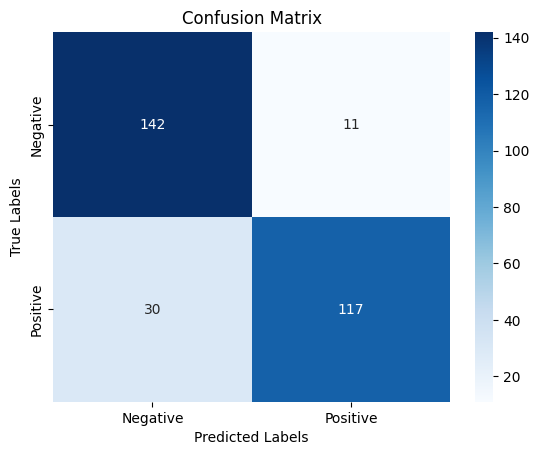

In [26]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

predictions = logits.argmax(axis=-1)

conf_matrix = confusion_matrix(true_labels, predictions)

print("Confusion Matrix:")
print(conf_matrix)

sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()